# 주제분석 (키즈카페 이용자 소비 현황 데이터)
- 키즈카페 이용자 소비 현황 데이터를 이용한 패턴 및 분석 후 마케팅 전략 제안

  
1. 데이터 전처리
2. 데이터 시각화

# 키즈카페 이용자 소비 현황 데이터 컬럼 설명

### 🏢 키즈카페 이용자 소비 현황 데이터 프레임 컬럼 설명

| 컬럼명                     | 설명                                  |
|--------------------------|--------------------------------------|
| CSTMR_ID               | 고객 ID                               |
| BASE_YM                | 기준년월                               |
| STR_ID                 | 매장 ID                               |
| AREA_NM                | 지역명                                 |
| ADSTRD_NM              | 행정동명                               |
| ADSTRD_CD              | 행정동코드                             |
| NT01_ENTCK_UNTPC_PRICE | 1회 입장권 단가                        |
| FDRM_ENTCK_UNTPC_PRICE | 정기 입장권 단가                       |
| NT01_ENTCK_PRCHS_CO    | 1회 입장권 구매 수                     |
| FDRM_ENTCK_USE_CO      | 정기 입장권 사용 수                    |
| COUPON_HOLD_CO         | 쿠폰 보유 수                           |
| SPND_SM_PRICE          | 소비 총액                              |
| BASE_MT_CSTMR_GRAD_VALUE | 기준월 고객 등급값                  |



- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가


In [1]:
import pandas as pd
import glob
# 2020-02 ~ 2022-02 키즈카페 이용자 소비 현황 데이터 데이터 프레임 생성

path_list = glob.glob("./datasets/rfm_datasets/*.csv")

dataframes = [pd.read_csv(path) for path in path_list]

kids_c_df = pd.concat(dataframes, ignore_index= True)
kids_c_df

,CSTMR_ID,BASE_YM,STR_ID,AREA_NM,ADSTRD_NM,ADSTRD_CD,NT01_ENTCK_UNTPC_PRICE,FDRM_ENTCK_UNTPC_PRICE,NT01_ENTCK_PRCHS_CO,FDRM_ENTCK_USE_CO,COUPON_HOLD_CO,SPND_SM_PRICE,BASE_MT_CSTMR_GRAD_VALUE
0,1523967,202107,castle01,서울특별시,양재1동,1165065100,3600.0,4320.0,10,15,0,97200.0,2
1,1483054,202107,withbebe01,경기도,상동,4119074400,5600.0,7000.0,5,16,0,124600.0,2
2,752059,202107,trinity01,경기도,광남2동,4161057000,4500.0,5400.0,10,4,0,72000.0,2
3,563779,202107,eoul3,경상북도,인동동,4719067000,3700.0,4440.0,10,4,0,59200.0,3
4,684127,202107,kingkong32,경기도,동탄1동,4159058500,4500.0,5400.0,10,12,2,108000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177425,1042369,202109,swan01,서울특별시,북가좌제1동,1141071000,10000.0,12000.0,0,0,1,0.0,3
177426,1240062,202109,lil15,인천광역시,송도1동,2818582000,6500.0,7800.0,0,0,1,0.0,3
177427,1443782,202109,noori01,광주광역시,어룡동,2920056500,3500.0,4200.0,0,0,1,0.0,3
177428,692002,202109,champ01,경기도,모현읍,4146125300,6000.0,7200.0,0,0,2,0.0,3


In [2]:
# 키즈카페 이용자 소비 현황 데이터 중 필요 데이터 컬럼 확인 및 명칭 변경
k_c_need_df = kids_c_df.copy()
k_c_need_df.columns = ['customer_id', 'create_date', 'kids_cafe_id','area_name', 'location_name', 'location_code',
                      'o_ticket_price', 'r_ticket_price','o_ticket_buy_count','r_tickect_use_count','coupon_count',
                      'total_span_money','month_customer_grade']

# 날짜 순으로 정렬
k_c_need_df = k_c_need_df.sort_values('create_date').reset_index(drop=True)

In [3]:
# 중복행 확인 -> 없음
k_c_need_df.duplicated().sum()

0

In [4]:
# 결측치 확인 -> 없음
k_c_need_df.isna().sum()

customer_id             0
create_date             0
kids_cafe_id            0
area_name               0
location_name           0
location_code           0
o_ticket_price          0
r_ticket_price          0
o_ticket_buy_count      0
r_tickect_use_count     0
coupon_count            0
total_span_money        0
month_customer_grade    0
dtype: int64

In [5]:
# 이상치 검사 => total span money 에서 customer_id 가 693783 인 고객이 약 1천 2백만원 사용 내역 확인
# 차후 그래프 그리다가 특이사항 발생 시 이상치 제거 예정 (제거 완료)

k_c_need_df[['total_span_money']].describe().T
k_c_need_df[k_c_need_df['total_span_money'] == k_c_need_df['total_span_money'].max()]

index_to_drop = k_c_need_df[k_c_need_df['customer_id'] == 693783].index
k_c_need_df = k_c_need_df.drop(index_to_drop).reset_index(drop=True)


In [6]:
# 날짜에 대한 부분을 datetime으로 변경 (형식은 년,월 존재)
k_c_need_df['create_date'] = pd.to_datetime(k_c_need_df['create_date'], format='%Y%m')
k_c_need_df.sort_values('create_date').reset_index(drop=True)
k_c_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,o_ticket_buy_count,r_tickect_use_count,coupon_count,total_span_money,month_customer_grade
0,804880,2020-02-01,kingkong35,전라북도,효자4동,4511171400,3600.0,3000.0,10,8,0,60000.0,2
1,1020011,2020-02-01,jvely01,서울특별시,신정2동,1147063000,6000.0,5000.0,0,1,0,5000.0,3
2,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,0,1,0,3700.0,3
3,193054,2020-02-01,lil15,서울특별시,세곡동,1168070000,7800.0,6500.0,0,1,0,6500.0,3
4,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,0,10,0,55000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177422,473656,2022-02-01,bonbon17,서울특별시,장안제2동,1123066000,7000.0,8400.0,0,2,0,14000.0,3
177423,1272697,2022-02-01,little01,인천광역시,원당동,2826070000,3200.0,3840.0,0,1,0,3200.0,3
177424,1585137,2022-02-01,hbb0514,서울특별시,상봉제2동,1126059000,6000.0,7200.0,0,1,0,6000.0,3
177425,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,0,3,0,18000.0,3


In [7]:
# month_customer_grade 의 경우 차후 RFM 데이터를 이용한 최종 등급으로 나타낼것이기 때문에 해당 feature 제거
k_c_need_df = k_c_need_df.drop(labels = 'month_customer_grade', axis =1)

In [8]:
# customer Recency 확인
# max 날짜 - 방문날짜
k_c_need_df['Recency'] = k_c_need_df['create_date'].max() - k_c_need_df['create_date']
k_c_need_df['Recency'] = k_c_need_df['Recency'].dt.days
k_c_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,o_ticket_buy_count,r_tickect_use_count,coupon_count,total_span_money,Recency
0,804880,2020-02-01,kingkong35,전라북도,효자4동,4511171400,3600.0,3000.0,10,8,0,60000.0,731
1,1020011,2020-02-01,jvely01,서울특별시,신정2동,1147063000,6000.0,5000.0,0,1,0,5000.0,731
2,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,0,1,0,3700.0,731
3,193054,2020-02-01,lil15,서울특별시,세곡동,1168070000,7800.0,6500.0,0,1,0,6500.0,731
4,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,0,10,0,55000.0,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177422,473656,2022-02-01,bonbon17,서울특별시,장안제2동,1123066000,7000.0,8400.0,0,2,0,14000.0,0
177423,1272697,2022-02-01,little01,인천광역시,원당동,2826070000,3200.0,3840.0,0,1,0,3200.0,0
177424,1585137,2022-02-01,hbb0514,서울특별시,상봉제2동,1126059000,6000.0,7200.0,0,1,0,6000.0,0
177425,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,0,3,0,18000.0,0


In [9]:
# customer Frequency 확인
# customer_id, kids_cafe_id, count
counts = k_c_need_df.groupby(['customer_id', 'kids_cafe_id']).size().reset_index(name='Frequency')

k_c_need_df = pd.merge(k_c_need_df, counts, how='left', left_on=['customer_id', 'kids_cafe_id'],right_on=['customer_id', 'kids_cafe_id'])
k_c_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,o_ticket_buy_count,r_tickect_use_count,coupon_count,total_span_money,Recency,Frequency
0,804880,2020-02-01,kingkong35,전라북도,효자4동,4511171400,3600.0,3000.0,10,8,0,60000.0,731,5
1,1020011,2020-02-01,jvely01,서울특별시,신정2동,1147063000,6000.0,5000.0,0,1,0,5000.0,731,1
2,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,0,1,0,3700.0,731,1
3,193054,2020-02-01,lil15,서울특별시,세곡동,1168070000,7800.0,6500.0,0,1,0,6500.0,731,1
4,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,0,10,0,55000.0,731,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177422,473656,2022-02-01,bonbon17,서울특별시,장안제2동,1123066000,7000.0,8400.0,0,2,0,14000.0,0,7
177423,1272697,2022-02-01,little01,인천광역시,원당동,2826070000,3200.0,3840.0,0,1,0,3200.0,0,3
177424,1585137,2022-02-01,hbb0514,서울특별시,상봉제2동,1126059000,6000.0,7200.0,0,1,0,6000.0,0,2
177425,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,0,3,0,18000.0,0,6


In [10]:
# customer Monetory 확인
# total_span_money => Monetary
k_c_need_df['Monetary'] = k_c_need_df['total_span_money']
k_c_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,o_ticket_buy_count,r_tickect_use_count,coupon_count,total_span_money,Recency,Frequency,Monetary
0,804880,2020-02-01,kingkong35,전라북도,효자4동,4511171400,3600.0,3000.0,10,8,0,60000.0,731,5,60000.0
1,1020011,2020-02-01,jvely01,서울특별시,신정2동,1147063000,6000.0,5000.0,0,1,0,5000.0,731,1,5000.0
2,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,0,1,0,3700.0,731,1,3700.0
3,193054,2020-02-01,lil15,서울특별시,세곡동,1168070000,7800.0,6500.0,0,1,0,6500.0,731,1,6500.0
4,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,0,10,0,55000.0,731,4,55000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177422,473656,2022-02-01,bonbon17,서울특별시,장안제2동,1123066000,7000.0,8400.0,0,2,0,14000.0,0,7,14000.0
177423,1272697,2022-02-01,little01,인천광역시,원당동,2826070000,3200.0,3840.0,0,1,0,3200.0,0,3,3200.0
177424,1585137,2022-02-01,hbb0514,서울특별시,상봉제2동,1126059000,6000.0,7200.0,0,1,0,6000.0,0,2,6000.0
177425,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,0,3,0,18000.0,0,6,18000.0


In [11]:
# RFM 데이터프레임 생성
k_c_rfm_df = k_c_need_df[['Recency', 'Frequency', 'Monetary']]
k_c_rfm_df

,Recency,Frequency,Monetary
0,731,5,60000.0
1,731,1,5000.0
2,731,1,3700.0
3,731,1,6500.0
4,731,4,55000.0
...,...,...,...
177422,0,7,14000.0
177423,0,3,3200.0
177424,0,2,6000.0
177425,0,6,18000.0


In [12]:
# RFM 데이터 프레임 정규화 작업
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(k_c_rfm_df)

k_c_rfm_df = pd.DataFrame(rfm_normalization, columns=k_c_rfm_df.columns)
k_c_rfm_df

,Recency,Frequency,Monetary
0,1.0,0.307692,0.004938
1,1.0,0.000000,0.000412
2,1.0,0.000000,0.000305
3,1.0,0.000000,0.000535
4,1.0,0.230769,0.004527
...,...,...,...
177422,0.0,0.461538,0.001152
177423,0.0,0.153846,0.000263
177424,0.0,0.076923,0.000494
177425,0.0,0.384615,0.001481


In [13]:
# Recency의 경우 최근 방문 일자가 가장 높은 수치를 가져야 하기 때문에 1을 뺴준 수치를 Recency 값으로 측정
k_c_rfm_df['Recency'] = 1- k_c_rfm_df['Recency']
k_c_rfm_df

,Recency,Frequency,Monetary
0,0.0,0.307692,0.004938
1,0.0,0.000000,0.000412
2,0.0,0.000000,0.000305
3,0.0,0.000000,0.000535
4,0.0,0.230769,0.004527
...,...,...,...
177422,1.0,0.461538,0.001152
177423,1.0,0.153846,0.000263
177424,1.0,0.076923,0.000494
177425,1.0,0.384615,0.001481


In [14]:
# RFM TotalScore 점수 생성
k_c_need_df['TotalScore'] = k_c_rfm_df['Recency'] + k_c_rfm_df['Frequency'] + k_c_rfm_df['Monetary']
k_c_need_df['Recency'] =k_c_rfm_df['Recency']
k_c_need_df['Frequency'] =k_c_rfm_df['Frequency']
k_c_need_df['Monetary'] =k_c_rfm_df['Monetary']

In [15]:
# 4분위표 확인 후 25,50,70, 90 으로 분류
k_c_need_df[['TotalScore']].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalScore,177427.0,0.775877,0.384445,0.0,0.490865,0.819676,1.063,2.001416


In [16]:
import numpy as np

l1, l2, l3, l4 = np.percentile(k_c_need_df['TotalScore'], [25, 50, 75, 90])
print(l1, l2, l3, l4)

0.49086544903082374 0.8196764894256915 1.0630004040309557 1.2457208704723526


In [17]:
def get_grade(x):
    if x <= l1:
        return 5
    if x > l1 and x < l2:
        return 4
    if x > l2 and x < l3:
        return 3
    if x > l3 and x < l4:
        return 2
    return 1

In [18]:
k_c_need_df['Grade'] = k_c_need_df['TotalScore'].apply(get_grade)
k_c_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,o_ticket_buy_count,r_tickect_use_count,coupon_count,total_span_money,Recency,Frequency,Monetary,TotalScore,Grade
0,804880,2020-02-01,kingkong35,전라북도,효자4동,4511171400,3600.0,3000.0,10,8,0,60000.0,0.0,0.307692,0.004938,0.312631,5
1,1020011,2020-02-01,jvely01,서울특별시,신정2동,1147063000,6000.0,5000.0,0,1,0,5000.0,0.0,0.000000,0.000412,0.000412,5
2,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,0,1,0,3700.0,0.0,0.000000,0.000305,0.000305,5
3,193054,2020-02-01,lil15,서울특별시,세곡동,1168070000,7800.0,6500.0,0,1,0,6500.0,0.0,0.000000,0.000535,0.000535,5
4,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,0,10,0,55000.0,0.0,0.230769,0.004527,0.235296,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177422,473656,2022-02-01,bonbon17,서울특별시,장안제2동,1123066000,7000.0,8400.0,0,2,0,14000.0,1.0,0.461538,0.001152,1.462691,1
177423,1272697,2022-02-01,little01,인천광역시,원당동,2826070000,3200.0,3840.0,0,1,0,3200.0,1.0,0.153846,0.000263,1.154110,2
177424,1585137,2022-02-01,hbb0514,서울특별시,상봉제2동,1126059000,6000.0,7200.0,0,1,0,6000.0,1.0,0.076923,0.000494,1.077417,2
177425,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,0,3,0,18000.0,1.0,0.384615,0.001481,1.386097,1


In [19]:
k_c_need_df['Grade'] = k_c_need_df['Grade'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
k_c_need_df= k_c_need_df.drop(labels = ['o_ticket_buy_count', 'r_tickect_use_count', 'coupon_count'], axis=1)
k_c_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,total_span_money,Recency,Frequency,Monetary,TotalScore,Grade
0,804880,2020-02-01,kingkong35,전라북도,효자4동,4511171400,3600.0,3000.0,60000.0,0.0,0.307692,0.004938,0.312631,Bronze
1,1020011,2020-02-01,jvely01,서울특별시,신정2동,1147063000,6000.0,5000.0,5000.0,0.0,0.000000,0.000412,0.000412,Bronze
2,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,3700.0,0.0,0.000000,0.000305,0.000305,Bronze
3,193054,2020-02-01,lil15,서울특별시,세곡동,1168070000,7800.0,6500.0,6500.0,0.0,0.000000,0.000535,0.000535,Bronze
4,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,55000.0,0.0,0.230769,0.004527,0.235296,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177422,473656,2022-02-01,bonbon17,서울특별시,장안제2동,1123066000,7000.0,8400.0,14000.0,1.0,0.461538,0.001152,1.462691,VIP
177423,1272697,2022-02-01,little01,인천광역시,원당동,2826070000,3200.0,3840.0,3200.0,1.0,0.153846,0.000263,1.154110,Diamond
177424,1585137,2022-02-01,hbb0514,서울특별시,상봉제2동,1126059000,6000.0,7200.0,6000.0,1.0,0.076923,0.000494,1.077417,Diamond
177425,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,18000.0,1.0,0.384615,0.001481,1.386097,VIP


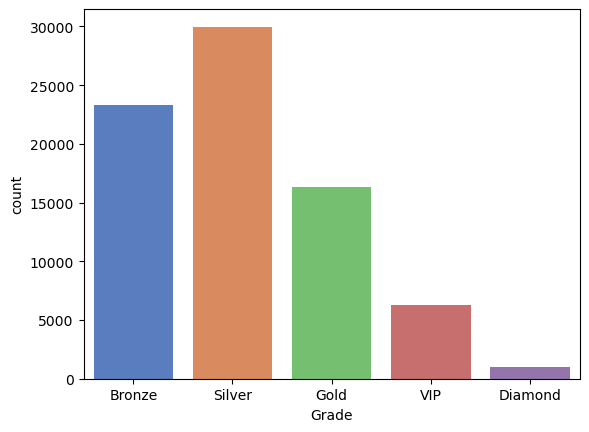

In [20]:
import warnings
warnings.filterwarnings('ignore')

# 1. 전체 count 를 등급으로 분류
import matplotlib.pyplot as plt
import seaborn as sns

customer_grade_df = k_c_need_df.groupby('customer_id')['Grade'].max().reset_index()

sns.countplot(x='Grade', data=customer_grade_df, palette='muted')
plt.show()

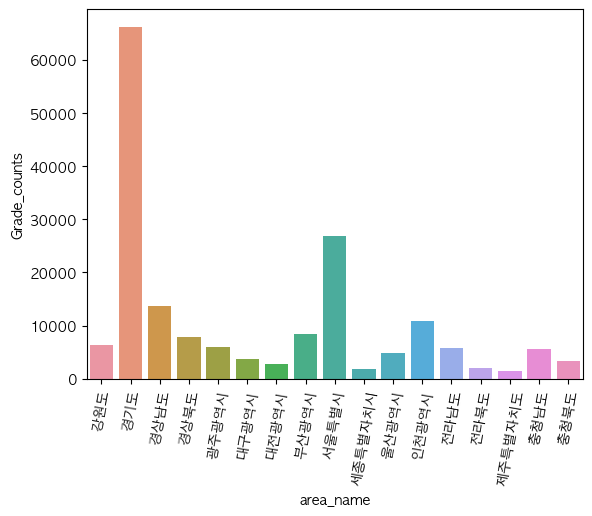

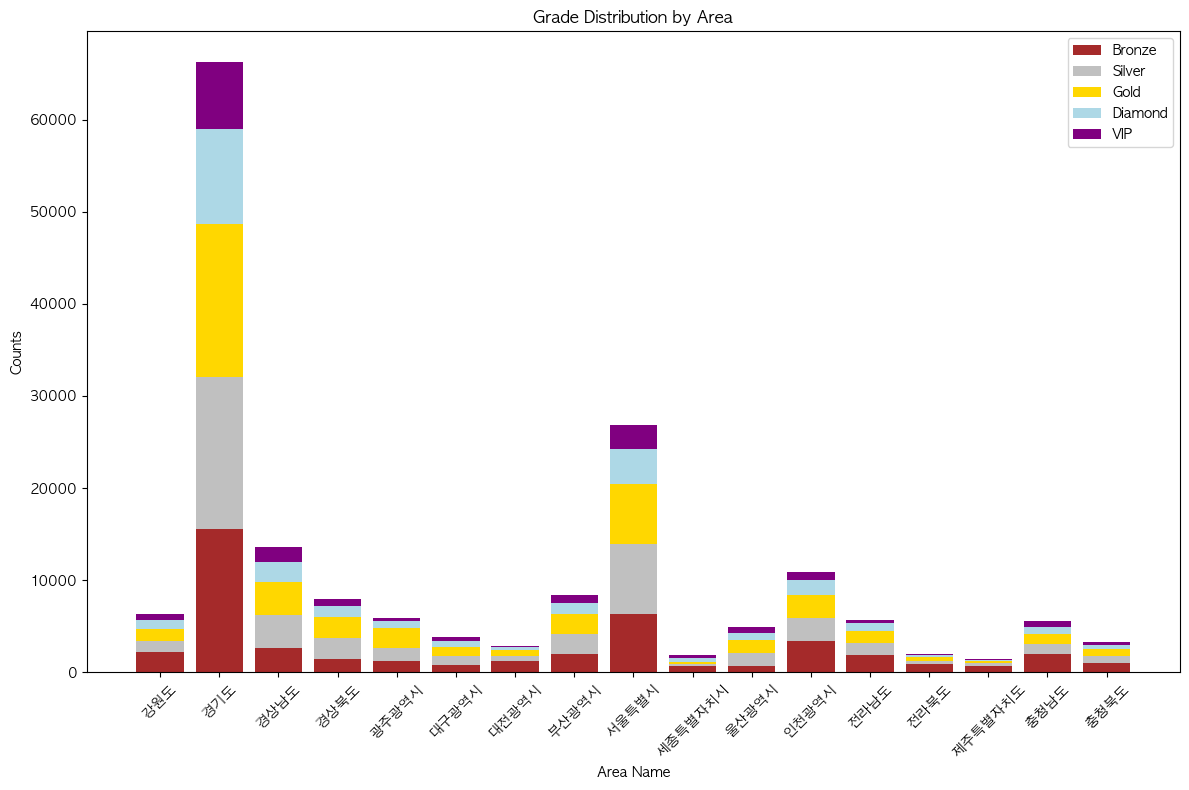

In [21]:
# 2. 지역을 기준으로 등급별 count를 막대그래프 생성
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'


grade_counts = k_c_need_df.groupby('area_name')['Grade'].size().reset_index(name='Grade_counts')
sns.barplot(x='area_name', y='Grade_counts', data=grade_counts)
plt.xticks(rotation=80)  # x 축 레이블이 겹칠 경우 회전
plt.show()

# 지역과 고객 등급별로 데이터를 그룹화하고 개수를 세어 집계합니다.
grade_level_df = k_c_need_df.groupby(['area_name', 'Grade']).size().reset_index(name='Count')
grade_level_df

# pivot_table을 사용하여 데이터를 재구조화합니다.
pivot_df = grade_level_df.pivot_table(index='area_name', columns='Grade', values='Count', fill_value=0)
pivot_df = pivot_df.reset_index()
pivot_df

plt.figure(figsize=(12, 8))

# 각 등급별 막대를 쌓아 올립니다.
# bottom 매개변수는 이전 등급의 누적 값을 기준으로 다음 막대가 쌓이는 위치를 결정합니다.
plt.bar(pivot_df['area_name'], pivot_df['Bronze'], label='Bronze', color='brown')
plt.bar(pivot_df['area_name'], pivot_df['Silver'], bottom=pivot_df['Bronze'], label='Silver', color='silver')
plt.bar(pivot_df['area_name'], pivot_df['Gold'], bottom=pivot_df['Bronze'] + pivot_df['Silver'], label='Gold', color='gold')
plt.bar(pivot_df['area_name'], pivot_df['Diamond'], bottom=pivot_df['Bronze'] + pivot_df['Silver'] + pivot_df['Gold'], label='Diamond', color='lightblue')
plt.bar(pivot_df['area_name'], pivot_df['VIP'], bottom=pivot_df['Bronze'] + pivot_df['Silver'] + pivot_df['Gold'] + pivot_df['Diamond'], label='VIP', color='purple')

plt.xticks(rotation=45)  # x 축 레이블이 겹칠 경우 회전
plt.xlabel('Area Name')  # x 축 레이블
plt.ylabel('Counts')  # y 축 레이블
plt.title('Grade Distribution by Area')  # 그래프 제목
plt.legend()  # 범례 표시

plt.tight_layout()
plt.show()


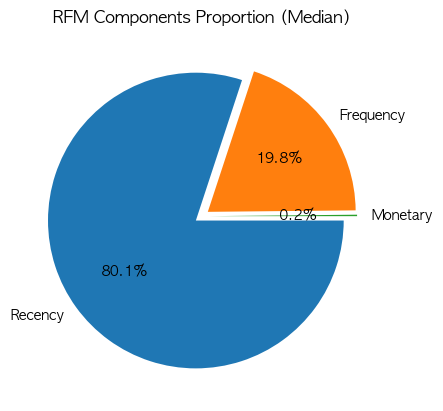

In [22]:
# 3. 전체 totalscore 기준으로 대한 rfm 에 대한 중앙값에 대한 비중 확인
rec = k_c_need_df['Recency'].median()
fre = k_c_need_df['Frequency'].median()
mone = k_c_need_df['Monetary'].median()

radio = [rec, fre, mone]
labels = ['Recency','Frequency','Monetary']

explode = [0.05, 0.05, 0.05 ]

plt.pie(radio, labels = labels, autopct = '%.1f%%',counterclock=False, explode=explode)
plt.title('RFM Components Proportion (Median)')
plt.show()

# 현재 전체 고객을 비교 했을 떄 총 사용 금액보다 최근 방문기한과 방문 횟수(구매 횟수)에 
# 중요도가 높을 수 있으며 최근 방문(소비 일자)에 따라 점수가 높을 수 있지만 해당 항목을 예외로 하더라도,
# 자주 방문하는 빈도에 따라 해당 키즈카페 고객의 등급이 올라가는 것을 알 수 있습니다.

In [23]:
# 키즈카페 1회권 구매금액 이상치 확인
import numpy as np

# 구매 가격의 경우 이상치가 있는지 사분위검사를 통해 최대값 최소값 확인
display(k_c_need_df[['o_ticket_price']].describe().T)


Q1 = k_c_need_df[['o_ticket_price']].describe().T.loc['o_ticket_price', '25%']
Q3 = k_c_need_df[['o_ticket_price']].describe().T.loc['o_ticket_price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
uppper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'키즈카페 1회권 구매금액의 정상치 범위: {lower_bound} ~ {uppper_bound}')


,count,mean,std,min,25%,50%,75%,max
o_ticket_price,177427.0,6037.741268,2439.21395,1000.0,4800.0,6000.0,6600.0,42000.0


키즈카페 1회권 구매금액의 정상치 범위: 2100.0 ~ 9300.0


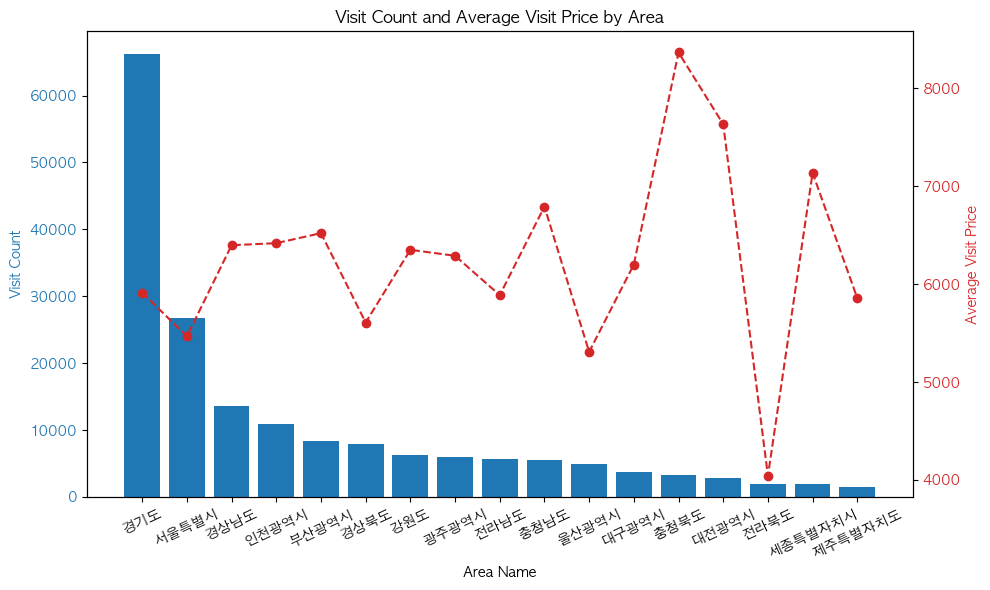

In [24]:
# 4. 지역별 1회 단가 평균값 에 따른 지역별 count 확인
# 지역별 1회 방문 단가
area_price_mean = k_c_need_df.groupby('area_name')['o_ticket_price'].mean()

# 지역별 방문 횟수 계산
area_count = k_c_need_df['area_name'].value_counts()

# 두 데이터 프레임 결합
combined_df = pd.DataFrame({'Average_Price': area_price_mean, 'Visit_Count': area_count}).reset_index()

# 막대 그래프 생성을 위한 데이터 정렬
combined_df.sort_values('Visit_Count', ascending=False, inplace=True)

# 복합 차트 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프: 방문 횟수
color = 'tab:blue'
ax1.set_xlabel('Area Name')
ax1.set_ylabel('Visit Count', color=color)
ax1.bar(combined_df['area_name'], combined_df['Visit_Count'], color=color)  # 수정된 부분
plt.xticks(rotation=25) 
ax1.tick_params(axis='y', labelcolor=color)

# 선 그래프: 1회 방문 단가 평균값
ax2 = ax1.twinx()  # y축을 공유하는 두 번째 축 생성
color = 'tab:red'
ax2.set_ylabel('Average Visit Price', color=color)
ax2.plot(combined_df['area_name'], combined_df['Average_Price'], color=color, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 레이아웃 조정
plt.title('Visit Count and Average Visit Price by Area')
plt.xticks(rotation=90)  # 지역명이 겹치지 않도록 각도 조정
fig.tight_layout()
plt.show()

# 가장 높은 방문 횟수: 그래프에서 첫 번째 지역이 방문 횟수가 가장 많다는 것을 알 수 있습니다. 
# 이는 이 지역이 다른 지역에 비해 키즈카페를 찾는 사람들이 가장 많다는 것을 의미할 수 있습니다.

# 단가와 방문 횟수의 관계: 단가와 방문 횟수 사이에 일정한 상관관계가 보이지 않습니다. 
# 일부 지역에서는 단가가 높음에도 방문 횟수가 높은 반면, 어떤 지역은 단가가 낮아도 방문 횟수가 적은 것을 볼 수 있습니다. 이는 다양한 요소에 의해 방문 횟수가 영향을 받을 수 있음을 나타냅니다(예: 접근성, 인구 밀도, 지역 경쟁 등).

# 단가의 변동성: 평균 단가가 지역에 따라 상당히 다르게 나타납니다.
# 어떤 지역은 상대적으로 높은 평균 단가를 보이는 반면, 다른 지역은 더 낮은 단가를 보입니다. 
# 이러한 변동성은 지역별 소득 수준, 임대료, 운영 비용 등에 의해 영향을 받을 수 있습니다.

# 특이점 확인: 단가가 특별히 높거나 낮은 지역은 추가 분석이 필요할 수 있습니다. 
# 예를 들어, 단가가 매우 높은데도 불구하고 방문 횟수가 높은 지역은 
# 고가의 서비스가 성공적임을 의미하거나 특별한 매력이 있는 지역일 수 있습니다.

# 방문 횟수가 작은 지역에서 단가가 높게 측정되는 부분은 대형 키즈카페가 존재할 수 있기 때문에 
# 해당 특이점이 나타날 수 있음을 시사합니다. (세종, 제주, 부산, 충북)
# 경기 지역을 제외한 대형 키즈카페의 순위권에 위와같은 지역의 키즈카페가 속해 있음을 알았습니다.
# 경기지역의 경우 대형 키즈카페 뿐만이 아니라 인구수 대비 키즈카페의 개수가 많아 1회 단가의 평균 금액이
# 높게 측정되지 않음을 시사할 수 있습니다. 
# http://www.soonwidot.co.kr/rank/search.php?stx=%EB%8C%80%ED%98%95%ED%82%A4%EC%A6%88%EC%B9%B4%ED%8E%98

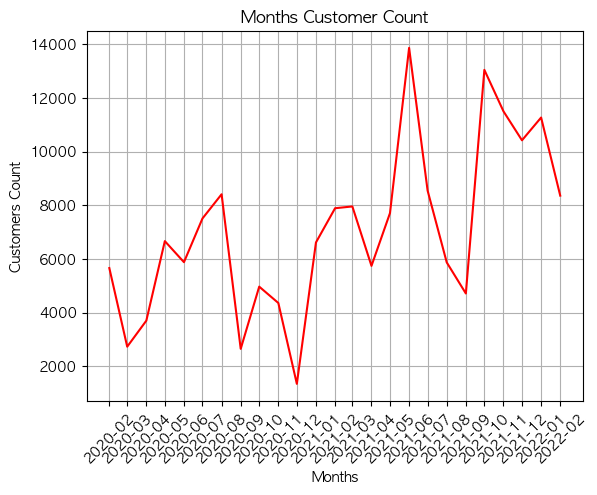

In [25]:
# 방문 일자별 고객 수 계산
month_customers = k_c_need_df.groupby('create_date')['customer_id'].size().reset_index(name='customer_count')

month_customers['month_year'] = month_customers['create_date'].dt.strftime('%Y-%m')
# 선 그래프(lineplot)으로 시각화
sns.lineplot(x='create_date', y='customer_count', data=month_customers, c='red')

plt.title('Months Customer Count')
plt.xlabel('Months')
plt.ylabel('Customers Count')

plt.xticks(ticks=month_customers['create_date'], labels=month_customers['month_year'], rotation=45)
plt.grid(True)

plt.show()

# 해당 그래프를 보았을 떄 2020 년의 경우 겨울과 여름 방학 기간에는 키즈카페 이용률이 떨어지는 것을 확인할 수 있습니다.
# 코로나의 경우 2019년에 최초 발생되어 2020 년에는 대한민국의 격리가 높았기 때문에 방학기간에도 
# 별도의 키즈카페 활동이 없었것으로 예상할 수 있습니다.
# 2021년의 경우 2020년보다 사회활동이 다수 증가하면서 전반적인 이용객이 높아진 부분을 확인할 수 있으며,
# 겨울과, 여름 방학 기간에 이용객이 떨어지고 다른 개월의 (가정의달) 같은 행사가 있는 개월에는 높은
# 이용객을 보이고 있습니다.

# 추세선을 그릴수 있는지 확인해서 추세선을 그릴 수 있으면 그릴것

## 2005 년을 기점으로 시도별 인구 확인 시 경기지역의 인구가 가장 높은 것으로 확인
<img src = "./images/image01.png" style="margin-left:0">
** 출처: 국가 통계 포털

In [26]:
# 경기도에 지역 location 대한 데이터 프레임 생성
k_c_my_need_df=k_c_need_df[k_c_need_df['area_name']=='경기도'].reset_index(drop=True)
k_c_my_need_df

,customer_id,create_date,kids_cafe_id,area_name,location_name,location_code,o_ticket_price,r_ticket_price,total_span_money,Recency,Frequency,Monetary,TotalScore,Grade
0,461621,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,3700.0,0.0,0.000000,0.000305,0.000305,Bronze
1,109774,2020-02-01,bonbon01,경기도,영덕1동,4146351600,6600.0,5500.0,55000.0,0.0,0.230769,0.004527,0.235296,Bronze
2,364980,2020-02-01,kingkong22,경기도,와부읍,4136025000,4440.0,3700.0,3700.0,0.0,0.000000,0.000305,0.000305,Bronze
3,281758,2020-02-01,stellad01,경기도,구래동,4157057000,5400.0,4500.0,22500.0,0.0,0.000000,0.001852,0.001852,Bronze
4,1326068,2020-02-01,bonbon15,경기도,미사2동,4145062000,7200.0,6000.0,30000.0,0.0,0.307692,0.002469,0.310161,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66282,488114,2022-02-01,kingkong20,경기도,영덕1동,4146351600,3500.0,4200.0,3500.0,1.0,0.000000,0.000288,1.000288,Gold
66283,458306,2022-02-01,eoul3,경기도,원신동,4128152000,3700.0,4440.0,3700.0,1.0,0.230769,0.000305,1.231074,Diamond
66284,903874,2022-02-01,bonbon16,경기도,장기본동,4157052500,5500.0,6600.0,5500.0,1.0,0.230769,0.000453,1.231222,Diamond
66285,701661,2022-02-01,luna01,경기도,가능동,4115059500,6000.0,7200.0,18000.0,1.0,0.384615,0.001481,1.386097,VIP


array([<Axes: >, <Axes: >], dtype=object)

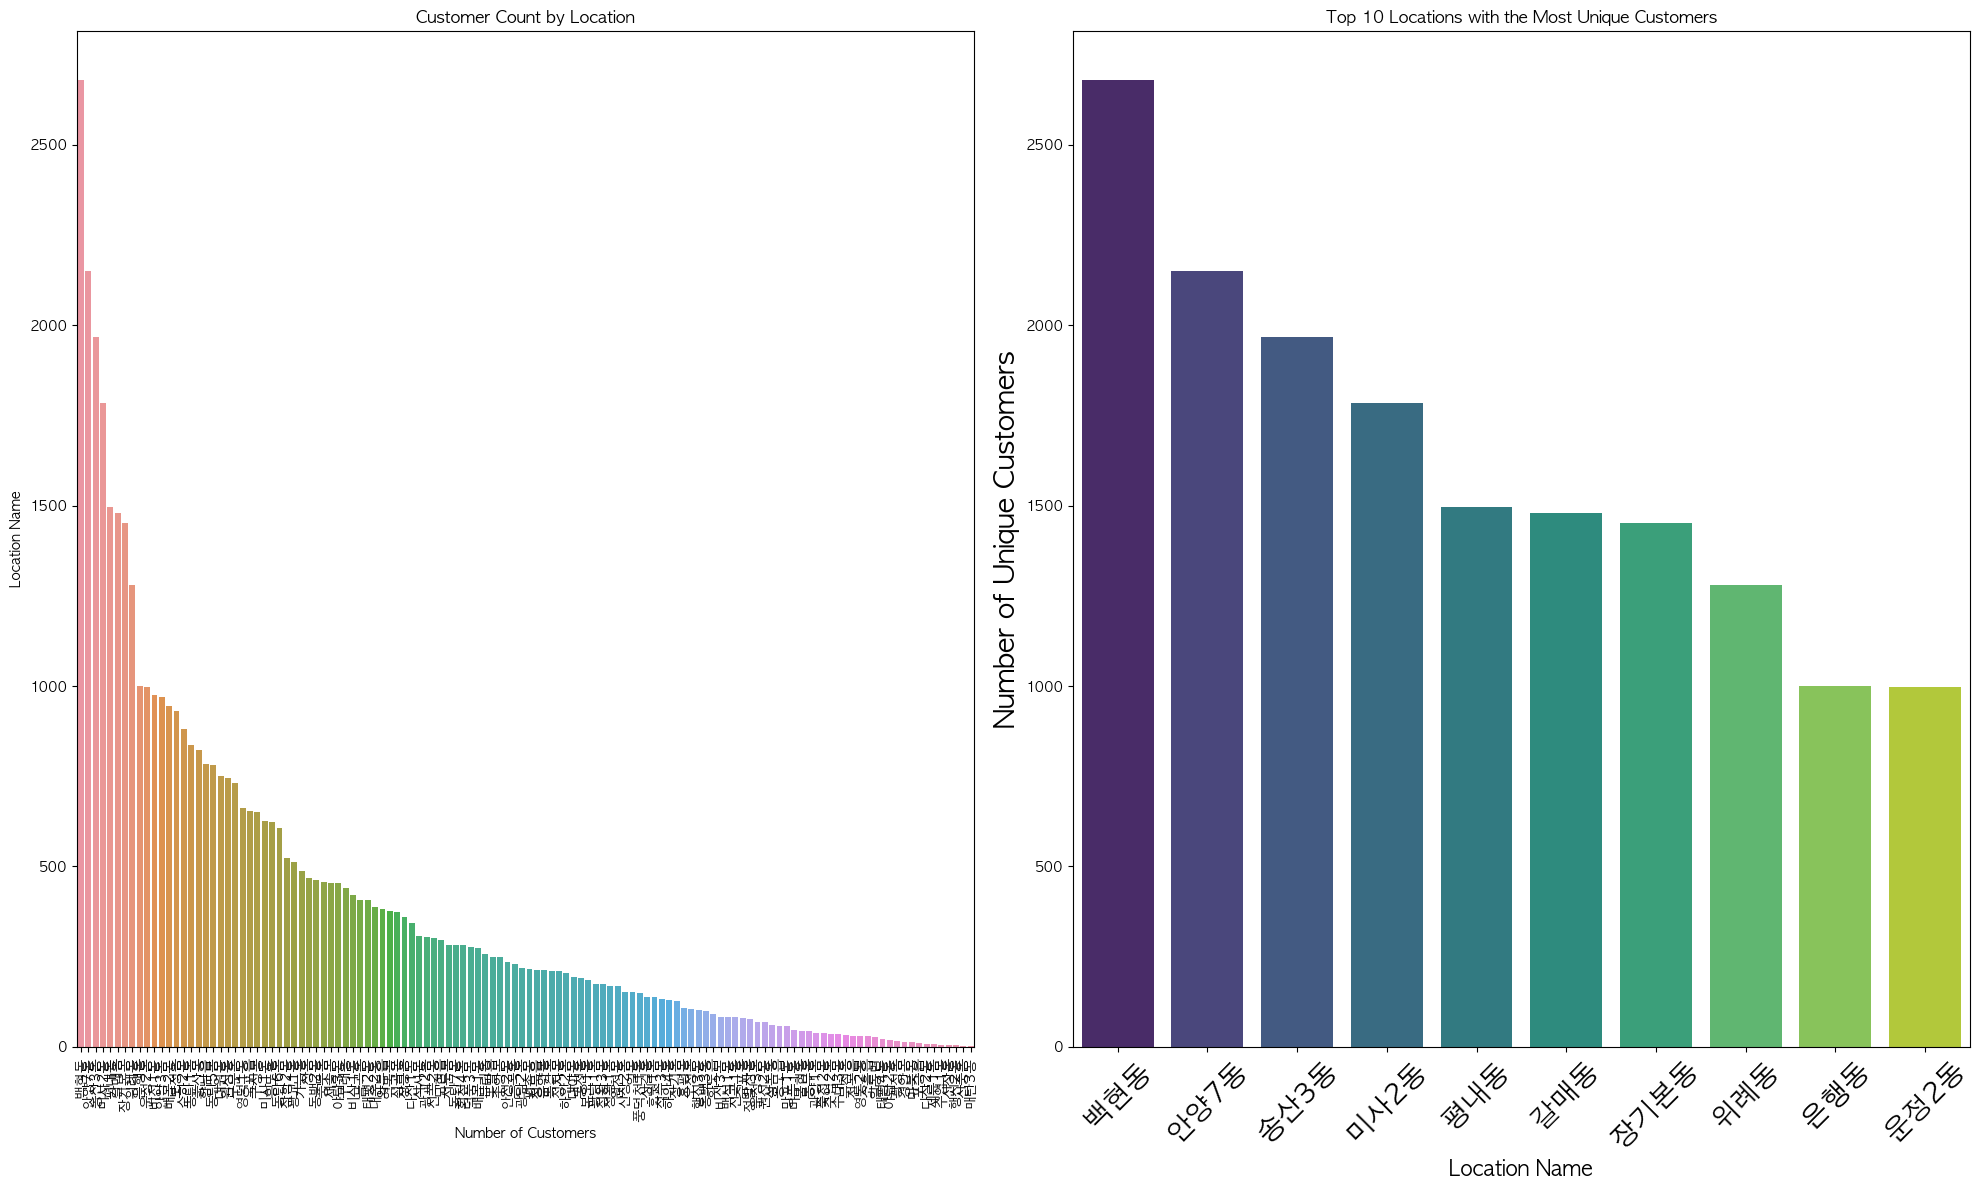

In [27]:
# 지역별 고유 고객 수 계산
location_customer_counts = k_c_my_need_df.groupby('location_name')['customer_id'].nunique()
# 시각화를 위한 데이터 프레임으로 변환
location_customer_counts_df = location_customer_counts.reset_index(name='unique_customers')
top10_locations = location_customer_counts_df.sort_values('unique_customers', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20,12))
display(axes)

# 막대 그래프로 시각화
sns.barplot(x='location_name', y='unique_customers', data=location_customer_counts_df.sort_values('unique_customers', ascending=False), ax=axes[0])
axes[0].set_title('Customer Count by Location')
axes[0].set_xlabel('Number of Customers')
axes[0].set_ylabel('Location Name')
axes[0].tick_params(axis='x', rotation=90)

# 막대 그래프로 시각화
sns.barplot(x='location_name', y='unique_customers', data=top10_locations, palette='viridis',ax=axes[1])
axes[1].set_title('Top 10 Locations with the Most Unique Customers')
axes[1].set_xlabel('Location Name', fontsize=15)
axes[1].set_ylabel('Number of Unique Customers', fontsize=20)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=20)
plt.tight_layout()
plt.show()


### 각각의 지리적위치를 봤을 떄 주거지역애서 차량 진입이 용이하거나 주거지역에 인접한 동네인 것을 알 수 있습니다. 또한 서울과 조금 떨어진 지역의 경우 신도시의 위치와 인접한 것을 확인 할 수 있습니다.

<div style="display: flex; flex-wrap: wrap; gap: 10px;">
    <div style="width: 50%;">
        <img src="./images/백현동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/안양7동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/송산3동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/미사2동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/평내동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/갈매동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/장기본동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/위례동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/은행동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/운정2동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
</div>

# RFM 프로젝트 보고서 (키즈카페 이용자 소비 현황 데이터)
이름: 김규산

## I. 분석의 목적
<!-- -  지역별 소비자가 선호하는 키즈카페 구역을 찾고 해당 배경을 바탕으로 어떠한 마케팅을 진행해야 키즈카페의 수익성을 증대 시킬 수 있는지 확인 -->
1. 본 분석은 지역별 소비자의 키즈카페 구역 선호도를 조사하여, 이러한 선호도에 기반한 마케팅 전략을 수립함으로써 키즈카페의 수익성 증대 방안을 탐색합니다.

## II. RFM 데이터 분석을 통한 시각화 그래프
> A. RFM Total 점수의 비중이 높은 RFM 요소 확인 (중앙값)  
> B. 월별 키즈카페 이용 현황 분석을 통해 특정 시기에 이용객이 집중되는 경향을 파악  
> C-1 키즈카페 이용자에 대한 등급별 분포 확인  
> C-2. 키즈카페 이용자의 소비 데이터를 분석하여 RFM 점수에 기반한 고객 등급을 평가하고, 이를 지역별로 분류하여 지역 특성에 따른 등급 분포의 차이를 시각화  
> D. 지역별 키즈카페 방문 빈도에 따른 평균 단일 방문 소비 금액 분석  
> E. 이와 같은 고객의 키즈카페 이용 행태 및 소비 패텅에 분석 결과를 종합하여 도출 결과 확인

        E-1. 고객의 키즈카페의 RFM 데이터를 소비자의 경우 키즈카페에서 총 소비금액이 아닌 방문횟수에 등급이 결정된다는 것을 알았습니다. 
        E-2. 가장 많이 차지하는 고객군인 Customer 등급을 분류하였을 때 상위 30% 이상의 고객층 보다 그 이외의 고객 층이 많음을 확인하였습니다.
        E-3. 월별 키즈카페 이용 현황 분석을 확인하였을 때 특정 개월에 방문고객이 증가하거나 적은 부분을 확인할 수 있었습니다. 
        E-4. 지역에 따른 Customer의 등급을 분류하였을 때 전체 지역에서 Gold 이하의 등급이 고객들이 대다수를 차지하고 있었으며 상위 30% 분포를 보았을 때,
        전체적인 지역에서 유사한 관계를 보여지고 있었으며 특정 지역에서 VIP 등급의 고객이 다수가 존재하다고는 판단하기 어려웠습니다.
        E-5. 키즈카페 1회 방문 가격을 비교해 봤을 때 다수의 고객이 방문하는 지역에서는 평균 금액이 어느정도 중간값을 보여주고 있었지만, 
        방문 고객이 적은 지역에서는 높은 가격이 형성되어 있거나 작은 금액이 형성되어있었음을 확인할 수 있었습니다. 
        해당 지역의 키즈카페 확인 결과 대형 키즈카페가 존재할  수 있음을 확인하였고 해당 키즈카페의 금액이 작은 키즈카페보다 높을 수 있기 때문에 평균가격이 높을 수 있음을 확인하였습니다.




## III. 결론
 - 키즈카페 소비자 현황을 비교해보았을 떄 키즈카페에서 실행해야할 주요 마케팅의 전략은 3가지가 있을 수 있음을 확인하였습니다.
1. 월별 프로모션 마케팅 (시즌별 및 지역별 마케팅 전략의 조정이 중요)
2. 대형 키즈카페의 존재가 평균 가격에 미치는 영향을 고려하여 경쟁력 있는 서비스를 제공하는 것이 중요
3. 고객 충성도와 재방문율을 높이기 위한 전략적 기회 제공
* 고객 충성도: 기업과 고객 사이에 유지되는 감정적 관계를 설명하는 명칭

## 추가 분석과 리서치


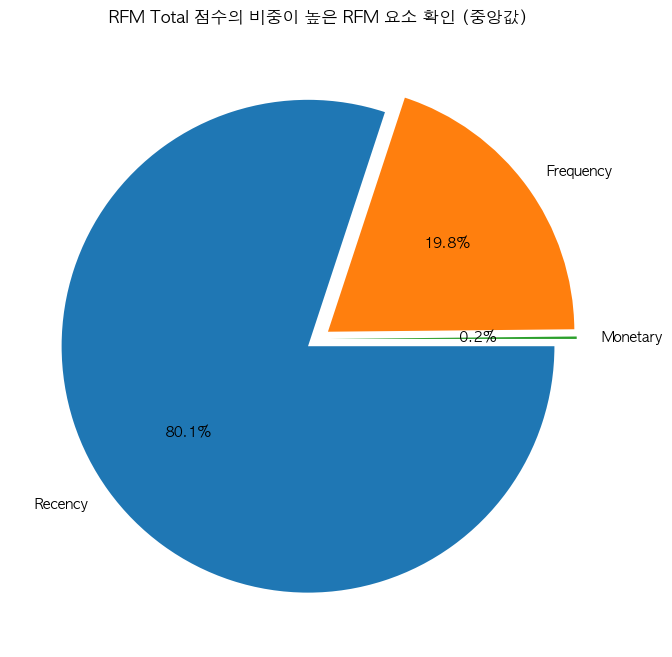

In [28]:
# A. RFM Total 점수의 비중이 높은 RFM 요소 확인 (중앙값)
plt.figure(figsize=(12, 8))
plt.pie(radio, labels = labels, autopct = '%.1f%%',counterclock=False, explode=explode)
# plt.title('RFM Components Proportion (Median)')
plt.title('RFM Total 점수의 비중이 높은 RFM 요소 확인 (중앙값)')

plt.show()


# 파이 그래프를 확인하였을 때 등급과 무관하게 전체 고객에 대하여 키즈카페에 소비 정도에 따른 Grade 를 구분 하였습니다.
# 이때 Recency 항목과 Frequency 항목이 상대적으로 Monetary 보다 높은 부분을 나타내고 있음을 확인 하였고 ,
# 키즈카페에 방문시 사용되는 금액보다 최근 방문정도와 방문 빈도가 고객의 등급에 상당한 영향을 주는 부분을 확인했습니다. 

# 아래와 같은 기사를 확인 했을 때 사설이 아닌 공립으로 운영되는 키즈 카페도 있기 때문에 가격적에서 안정성이 있는 부분도 있는 부분을 확인하였습니다.
# <img src="./images/A. 키즈카페 방문 관련 기사.PNG">
# ** 출처: 머니투데이



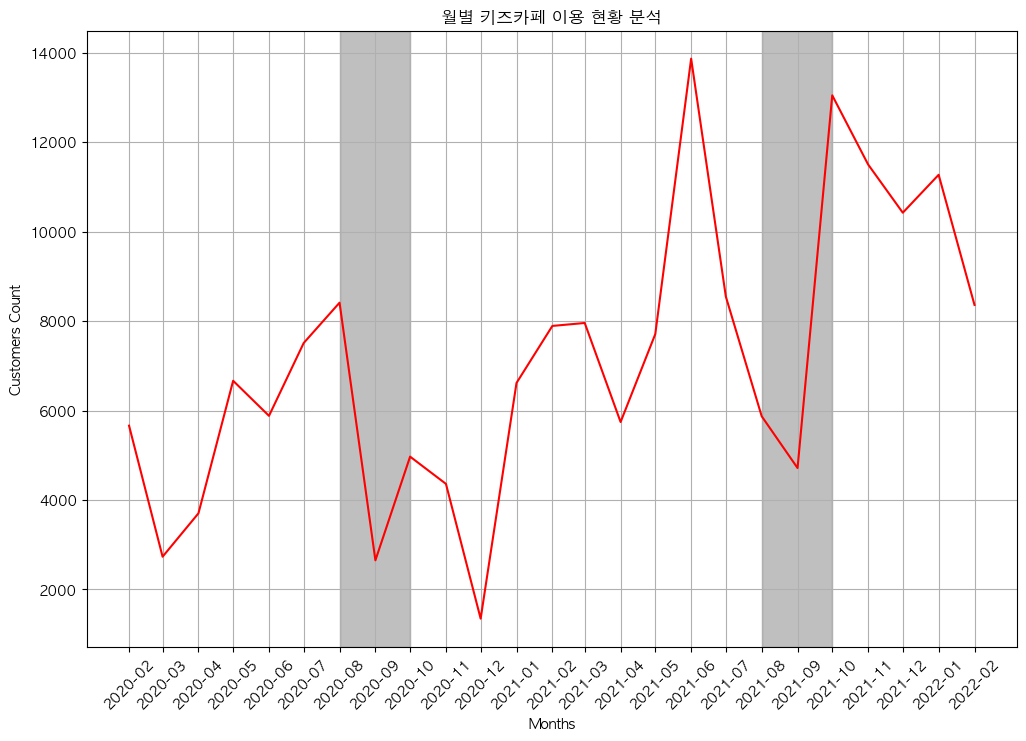

In [29]:
# B. 월별 키즈카페 이용 현황 분석을 통해 특정 시기에 이용객이 집중되는 경향을 파악합니다.
plt.figure(figsize=(12, 8))
month_customers = k_c_need_df.groupby('create_date')['customer_id'].size().reset_index(name='customer_count')
month_customers['month_year'] = month_customers['create_date'].dt.strftime('%Y-%m')

sns.lineplot(x='create_date', y='customer_count', data=month_customers, c='red')

# plt.title('Months Customer Count')
plt.title('월별 키즈카페 이용 현황 분석')

plt.xlabel('Months')
plt.ylabel('Customers Count')
plt.xticks(ticks=month_customers['create_date'], labels=month_customers['month_year'], rotation=45)
plt.grid(True)
plt.axvspan(xmin='2020-08', xmax='2020-10', color='gray', alpha=0.5)
plt.axvspan(xmin='2021-08', xmax='2021-10', color='gray', alpha=0.5)
plt.show()



# 해당 그래프에서 공통적인 특징으로는 여름휴가 기간에는 키즈카페의 이용률이 떨어지는 공통적인 특징을 보이고 있으며 
# 년도가 지날수록 전반적인 이용자가 늘고 있다는 것을 확인할 수 있습니다.

# 2021년의 경우 2020년보다 코로나의 백신이 개발되어 사람들의 사회 활동이 점차 증진되려고 하는 시기였습니다.
# 따라서 일반적인 특징을 보여주고 있는 겨울과, 여름 휴가 기간에 이용객이 떨어지고,
# 다른 개월의 (가정의달) 같은 행사가 있는 개월에는 높은 이용객을 보이고 있습니다.


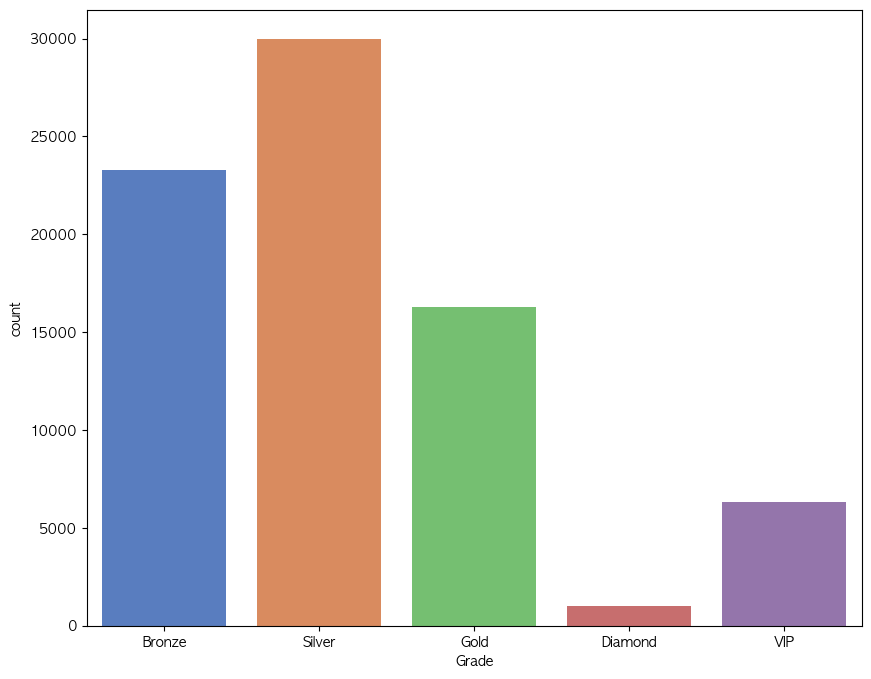

In [30]:
# C-1 키즈카페 이용자에 대한 등급별 분포 확인
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

customer_grade_df = k_c_need_df.groupby('customer_id')['Grade'].max().reset_index()
plt.figure(figsize=(10, 8))
sns.countplot(x='Grade', data=customer_grade_df, palette='muted', order = ['Bronze', 'Silver','Gold','Diamond', 'VIP'])
plt.show()

# 등급별 키즈카페 이용자의 분포를 확인했을 때 diamond 의 등급 기준이 75% 로 측정 되었기 때문에 상위 25% 등급이 현저히 적은 부분을 확인할 수 있습니다.


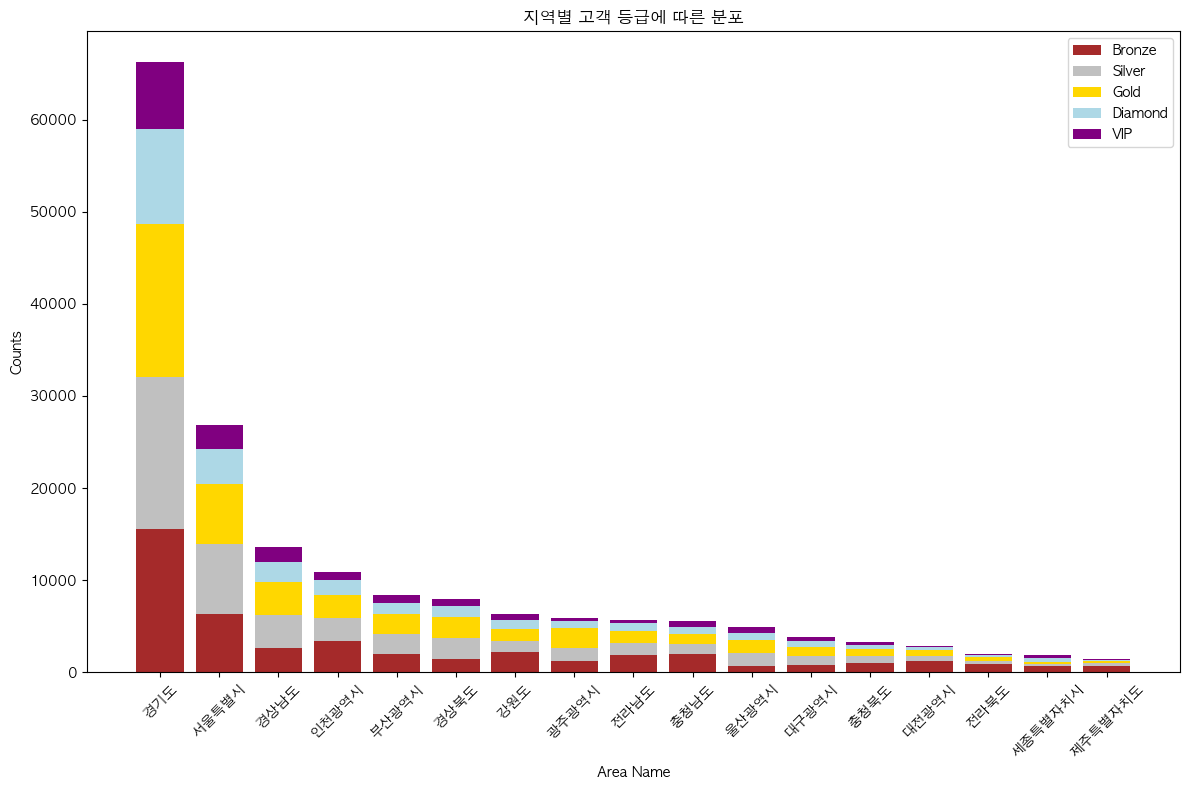

In [31]:
# C-2. 키즈카페 이용자의 소비 데이터를 분석하여 RFM 점수에 기반한 고객 등급을 평가하고, 이를 지역별로 분류하여 지역 특성에 따른 등급 분포의 차이를 시각화하여 파악합니다.

# 먼저, pivot_df에 'Total' 컬럼을 추가하여 각 지역별 전체 등급의 개수를 계산합니다.
pivot_df['Total'] = pivot_df[['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']].sum(axis=1)

# 'Total' 컬럼을 기준으로 pivot_df를 정렬합니다.
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False)

# 이제 정렬된 데이터프레임(pivot_df_sorted)을 사용하여 stacked bar plot을 다시 그립니다.
plt.figure(figsize=(12, 8))
plt.bar(pivot_df_sorted['area_name'], pivot_df_sorted['Bronze'], label='Bronze', color='brown')
plt.bar(pivot_df_sorted['area_name'], pivot_df_sorted['Silver'], bottom=pivot_df_sorted['Bronze'], label='Silver', color='silver')
plt.bar(pivot_df_sorted['area_name'], pivot_df_sorted['Gold'], bottom=pivot_df_sorted['Bronze'] + pivot_df_sorted['Silver'], label='Gold', color='gold')
plt.bar(pivot_df_sorted['area_name'], pivot_df_sorted['Diamond'], bottom=pivot_df_sorted['Bronze'] + pivot_df_sorted['Silver'] + pivot_df_sorted['Gold'], label='Diamond', color='lightblue')
plt.bar(pivot_df_sorted['area_name'], pivot_df_sorted['VIP'], bottom=pivot_df_sorted['Bronze'] + pivot_df_sorted['Silver'] + pivot_df_sorted['Gold'] + pivot_df_sorted['Diamond'], label='VIP', color='purple')
plt.xticks(rotation=45) 
plt.xlabel('Area Name')  
plt.ylabel('Counts')  
# plt.title('Grade Distribution by Area') 
plt.title('지역별 고객 등급에 따른 분포') 
plt.legend() 
plt.tight_layout()
plt.show()

# 위의 그래프에서 사용된 등급을 적용하여 대한민국의 지역 (광역시 및 자치 행정구역)에 따른 등급별 분포를 막대그래프로 표현하였습니다.
# 해당 그래프에서 경기 > 서울 > 경남 > 인천 > 부산 순으로 키즈카페 이용금액이 많은 부분을 확인할 수 있으며,
# 경기지역의 이용자가 키즈카페 이용자가 많으며, 해당 부분을 확인 했을 때 각각의 등급의 사용자도 이용자의 수에 영향을 받으며,
# 별도의 특이점 없이 분류되어 있는것으로 확인됩니다.

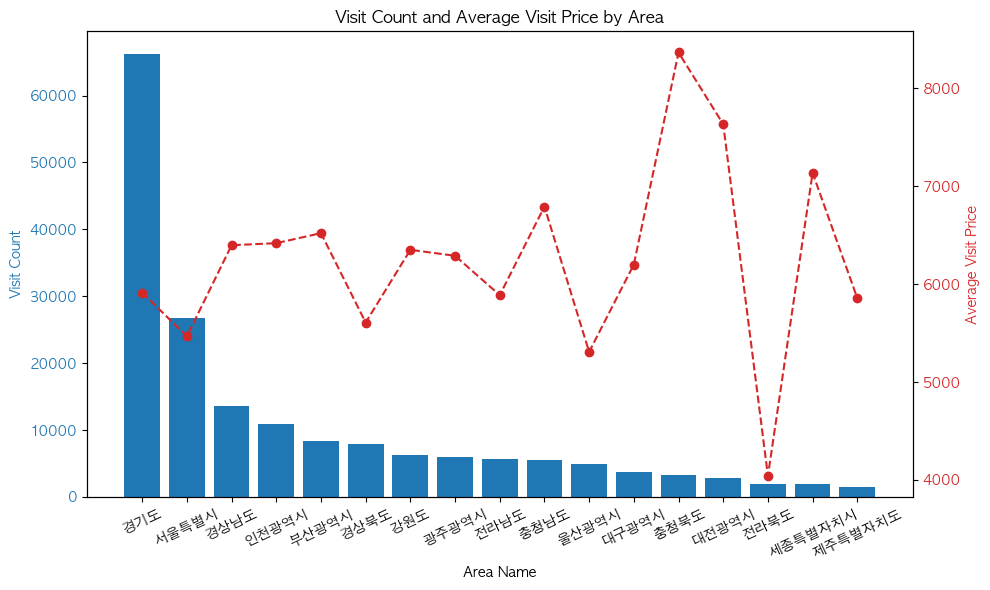

In [32]:
# D. 지역별 키즈카페 방문 빈도에 따른 평균 단일 방문 소비 금액 분석  

area_price_mean = k_c_need_df.groupby('area_name')['o_ticket_price'].mean()
area_count = k_c_need_df['area_name'].value_counts()
combined_df = pd.DataFrame({'Average_Price': area_price_mean, 'Visit_Count': area_count}).reset_index()
combined_df.sort_values('Visit_Count', ascending=False, inplace=True)
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:blue'
ax1.set_xlabel('Area Name')
ax1.set_ylabel('Visit Count', color=color)
ax1.bar(combined_df['area_name'], combined_df['Visit_Count'], color=color)  # 수정된 부분
plt.xticks(rotation=25) 
ax1.tick_params(axis='y', labelcolor=color)

# 선 그래프: 1회 방문 단가 평균값
ax2 = ax1.twinx()  # y축을 공유하는 두 번째 축 생성
color = 'tab:red'
ax2.set_ylabel('Average Visit Price', color=color)
ax2.plot(combined_df['area_name'], combined_df['Average_Price'], color=color, marker='o', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 레이아웃 조정
plt.title('Visit Count and Average Visit Price by Area')
plt.xticks(rotation=90)  # 지역명이 겹치지 않도록 각도 조정
fig.tight_layout()
plt.show()

# 가장 높은 방문 횟수: 바 그래프에서 겨익도 지역의 방문 소비자가 가장 많다는 것을 확인하였습니다.

# 단가와 방문 횟수의 관계: 단가와 방문 횟수 사이에 일정한 상관관계가 보이지 않으며 이는 다양한 요소에 의해 방문 횟수가 영향을 받을 수 있음을 나타냅니다
# (예: 접근성, 인구 밀도, 지역 경쟁 등).

# 단가의 변동성: 평균 단가가 지역에 따라 상당히 다르게 나타납니다.
# 이러한 변동성은 지역별 소득 수준, 임대료, 운영 비용 등에 의해 영향을 받을 수 있습니다.

# 방문 횟수가 작은 지역에서 단가가 높게 측정되는 부분은 대형 키즈카페가 존재할 수 있기 때문에 해당 특이점이 나타날 수 있음을 시사합니다. (세종, 제주, 부산, 충북)
# (방문횟수는 적지만 높은 가격이 형성 되었음에 시사할 수 있습니다.)
# 경기지역의 경우 대형 키즈카페 뿐만이 아니라 인구수 대비 키즈카페의 개수가 많아 1회 단가의 평균 금액이 높게 측정되지 않음을 시사할 수 있습니다. 
# http://www.soonwidot.co.kr/rank/search.php?stx=%EB%8C%80%ED%98%95%ED%82%A4%EC%A6%88%EC%B9%B4%ED%8E%98

array([<Axes: >, <Axes: >], dtype=object)

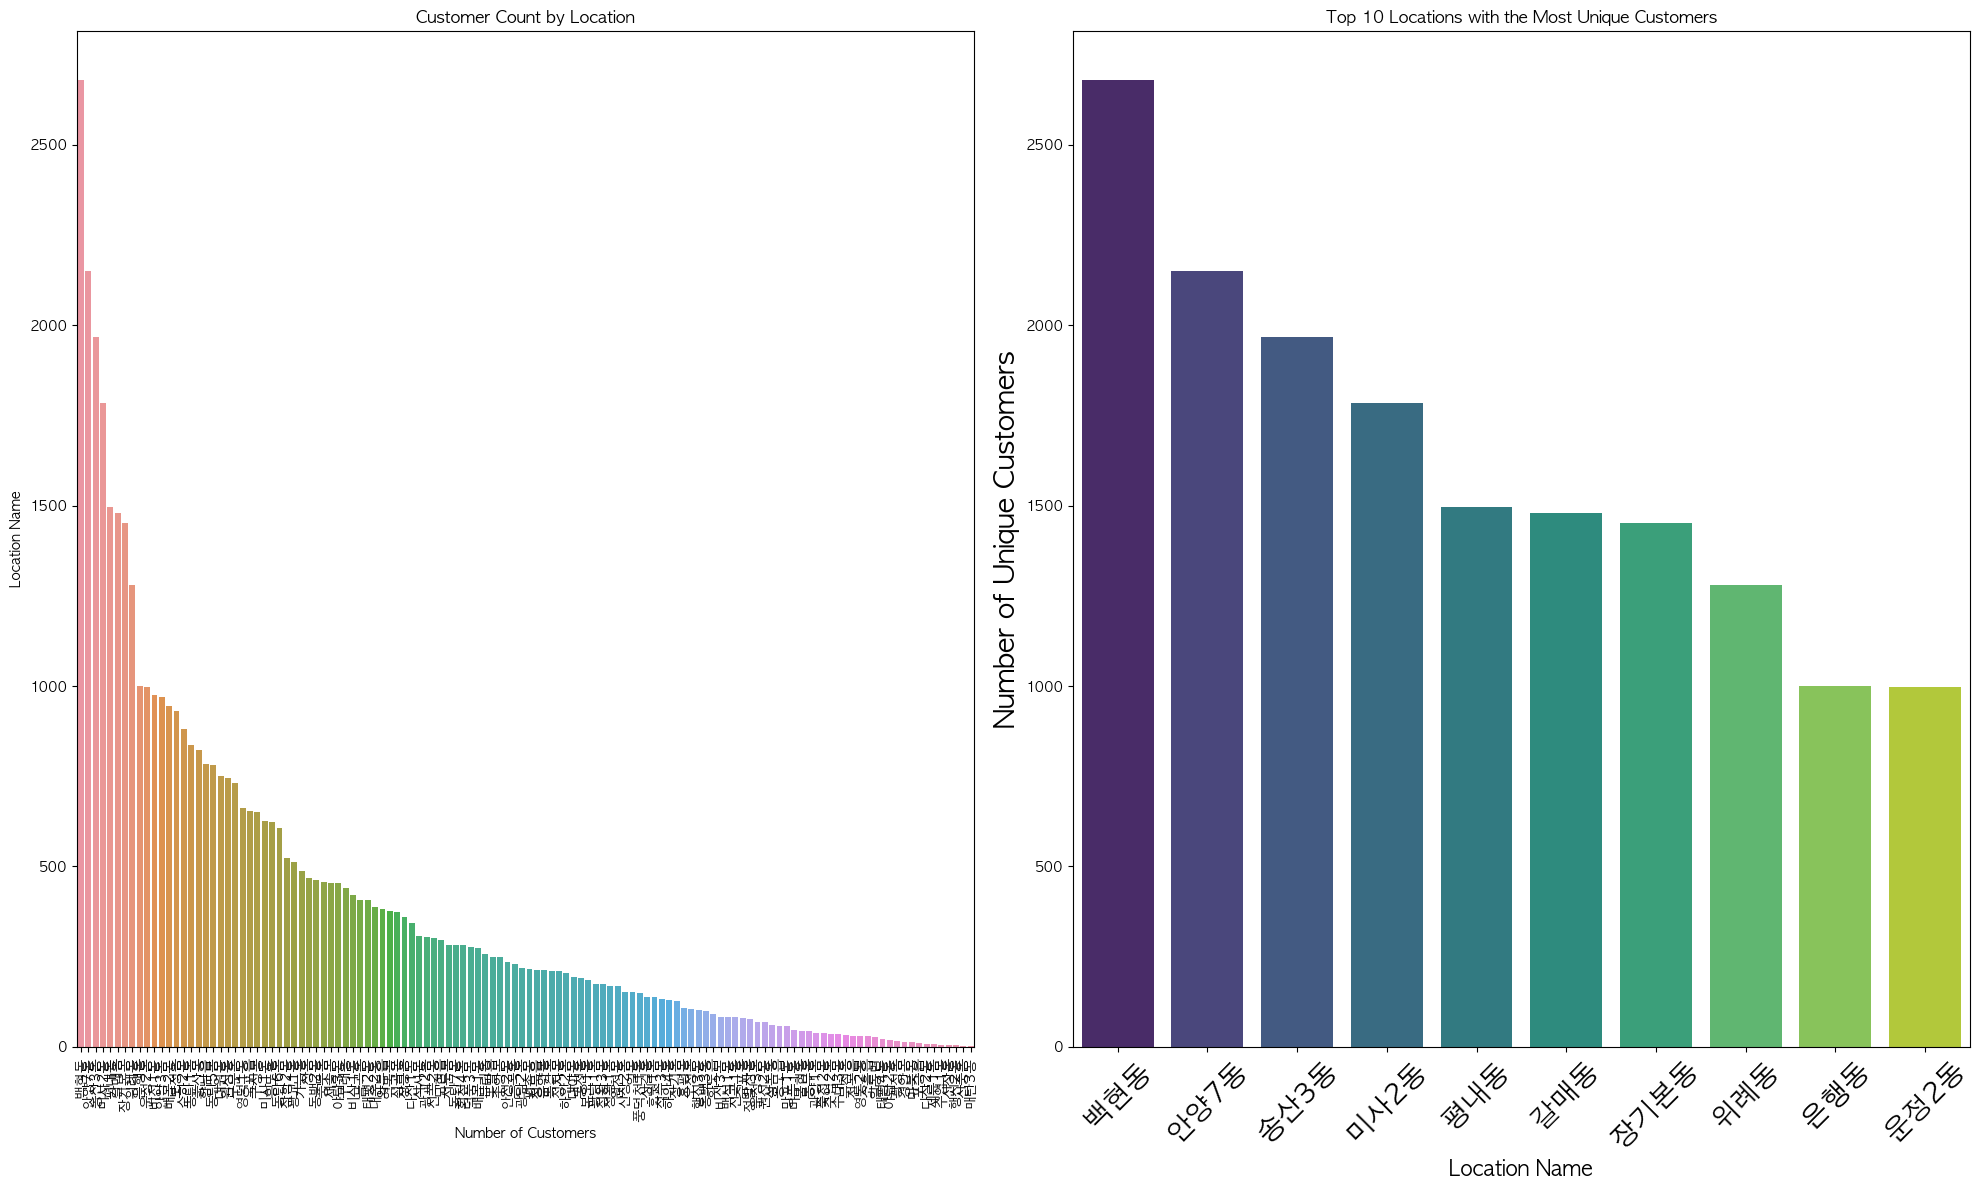

In [33]:
# D-2. 경기 지역의 경우 가장 방문 횟수가 높은 상우 10개 지역을 확인 후 어떤 특징이 있는지 지역을 확인
# 지역별 고유 고객 수 계산
location_customer_counts = k_c_my_need_df.groupby('location_name')['customer_id'].nunique()
# 시각화를 위한 데이터 프레임으로 변환
location_customer_counts_df = location_customer_counts.reset_index(name='unique_customers')
top10_locations = location_customer_counts_df.sort_values('unique_customers', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20,12))
display(axes)

# 막대 그래프로 시각화
sns.barplot(x='location_name', y='unique_customers', data=location_customer_counts_df.sort_values('unique_customers', ascending=False), ax=axes[0])
axes[0].set_title('Customer Count by Location')
axes[0].set_xlabel('Number of Customers')
axes[0].set_ylabel('Location Name')
axes[0].tick_params(axis='x', rotation=90)

# 막대 그래프로 시각화
sns.barplot(x='location_name', y='unique_customers', data=top10_locations, palette='viridis',ax=axes[1])
axes[1].set_title('Top 10 Locations with the Most Unique Customers')
axes[1].set_xlabel('Location Name', fontsize=15)
axes[1].set_ylabel('Number of Unique Customers', fontsize=20)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=20)
plt.tight_layout()
plt.show()

# 

- 지도를 통한 경기지역 10개 의 키즈카페 개수를 봤을 때 다수의 키즈카페가 존재한다고는 할 수 없지만 주위에 신도시가 인접해있거나,
주거지역과 연관이 있을 수 있음을 시사하고 있습니다.


<div style="display: flex; flex-wrap: wrap; gap: 10px;">
    <div style="width: 50%;">
        <img src="./images/백현동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/안양7동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/송산3동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/미사2동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/평내동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/갈매동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/장기본동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/위례동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
    <div style="width: 50%;">
        <img src="./images/은행동키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
        <img src="./images/운정2동 키즈카페.PNG" style="width: 100%; height: 200px; object-fit: cover;">
    </div>
</div>

방문 빈도 중심의 고객 등급 부여: 키즈카페에서의 고객 등급 결정은 총 소비 금액이 아닌 방문 횟수에 기반을 둔다는 사실을 확인했습니다. 이는 키즈카페 운영자에게 고객의 충성도와 재방문율을 높이기 위한 전략 수립에 중요한 정보를 제공합니다.

고객 분포의 이해: 고객군 분석 결과, 가장 큰 비중을 차지하는 'Customer' 등급의 고객층은 상위 30% 이상의 고객층보다 많다는 것을 확인하였습니다. 이는 마케팅 전략을 수립할 때 중등급 고객층의 유지 및 개선에 주목할 필요가 있음을 시사합니다.

월별 이용 현황의 변동성: 특정 개월에 방문 고객 수가 급증하거나 감소하는 패턴을 발견했습니다. 이는 시즌별 또는 월별 마케팅 활동 및 이벤트 기획에 있어 중요한 인사이트를 제공합니다.

지역별 고객 등급 분포: 지역별로 'Customer' 등급을 분류했을 때, 대부분의 지역에서 'Gold' 이하 등급의 고객이 대다수를 차지하는 것으로 나타났습니다. 또한, 모든 지역에서 상위 30% 고객 분포가 유사했으며, 'VIP' 등급 고객의 집중이 특정 지역에 한정되지 않는 것으로 확인되었습니다.

키즈카페 이용 가격 분석: 방문 고객 수가 많은 지역의 키즈카페 1회 방문 가격은 중간값을 나타내는 반면, 고객 수가 적은 지역에서는 높거나 낮은 가격이 형성되어 있었습니다. 특히, 방문 고객이 적은 지역에서 높은 가격이 형성된 경우, 대형 키즈카페의 존재 가능성이 있으며, 이는 해당 지역의 키즈카페 평균 가격을 높이는 요인일 수 있습니다.

# Tip. 트러블 슈팅
- 위에서 분석한 데이터의 경우 RFM 수치를 확인했을 때 가중치가 적용되지 않은 수치들에 대하여 분석이 진행되었습니다.
- 또한 소비자의 등급은 소비 금액이 아닌 방문 횟수에 따라 결정됨을 확인하였습니다.
- 이에 따라 Recency, Frequency가 고객 등급에 상대적으로 중요한 영향을 미치므로 Monetary 보다는 높은 가중치를 부여할 수 있습니다.
- 

In [ ]:
Recency와 Frequency가 고객 등급에 중요한 영향을 미치므로, 이 두 항목에 더 높은 가중치를 두는 것이 적절합니다.
Monetary는 상대적으로 덜 중요하므로, 낮은 가중치를 부여합니다.

<img src="./images/rfm분석 이미지/RFM 프로젝트 보고서_page-0001.jpg">
<hr>
<img src="./images/rfm분석 이미지/RFM 프로젝트 보고서_page-0002.jpg">
<hr>
<img src="./images/rfm분석 이미지/RFM 프로젝트 보고서_page-0003.jpg">
<hr>
<img src="./images/rfm분석 이미지/RFM 프로젝트 보고서_page-0004.jpg">
<hr>
<img src="./images/rfm분석 이미지/RFM 프로젝트 보고서_page-0005.jpg">
<hr>